In [ ]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install keras
!{sys.executable} -m pip install matplotlib

In [7]:
import utils
from utils import TrainingPlot, TimeSummary, plot_training_summary
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import clear_output
from keras.callbacks import Callback
from keras.callbacks import TensorBoard, ModelCheckpoint
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split

## Data Preparation

### Data Cleanup
Merge multiple lines to create vectors of size 64 (folder "fix")

### Prepare subset of data
For development purpose, take 5th line of each genome file and prepare a subset (foolder "split")


In [13]:
class NNKeras:
    def __init__(self, url: str):
        self._url = url
        self._num_cols = 64
        self._call_back = TensorBoard(log_dir='../logs', histogram_freq=0, batch_size=32, write_graph=True,
                                      write_grads=False, write_images=False, embeddings_freq=0,
                                      embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None,
                                      update_freq='epoch')
        self._call_back_model = ModelCheckpoint('../logs/model.ckpt', monitor='val_loss', verbose=0,
                                                save_best_only=False, save_weights_only=False, mode='auto', period=1)

    def read_data(self):
        df = pd.read_csv(self._url, header=None)
        X = df.iloc[:, 1:].astype(float)
        classes = df.iloc[:, 0]
        unique_classes = pd.DataFrame(sorted([c.upper() for c in classes.unique()]))
        rows = X.shape[0]
        unique_classes['indices'] = range(1, len(unique_classes) + 1)
        
        #np.eye(ncat)[y]
        
        y = np.zeros((rows, len(unique_classes)), np.bool)
        for i in range(rows):
            col_idx = np.where(unique_classes.loc[:, 0] == classes[i].upper())
            y[i, col_idx] = True
        return X, y, unique_classes

    def base_model(self, nodes):
        model = Sequential()

        for prev_node, node in zip(nodes[:-1], nodes[1:]):
            model.add(Dense(node, activation='relu', input_dim=prev_node))  # Add the first hidden layer

        model.add(Dense(31, activation='sigmoid', input_dim=nodes[-1]))  # Add the output layer
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def train(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=5)
        plot_losses = TrainingPlot()
        time_summary = TimeSummary()
        for num_nodes in range(2, 35):
            nodes = [64, num_nodes]
            model = self.base_model(nodes)
#             callbacks = [self._call_back, time_summary, plot_losses, self._call_back_model]
            callbacks = [time_summary]
            summary = model.fit(X_train, y_train, epochs=10, verbose=0, callbacks=callbacks)
            score = model.evaluate(X_test, y_test)
            plot_training_summary(summary, time_summary)
            print('Test loss:', score[0])
            print('Test accuracy:', score[1])
            print('Nodes:', num_nodes)

In [14]:
# nn = NNKeras("https://raw.githubusercontent.com/hardikgw/neural-network-poc/master/data/dataset/dataset.csv")
nn = NNKeras("/tf/dataset/dataset.csv")

In [15]:
X, y, unique_classes = nn.read_data()

157/157 [==============================] - 1s 4ms/step
Training time: 0:00:03.691993
Epoch time avg: 0:00:00.369180


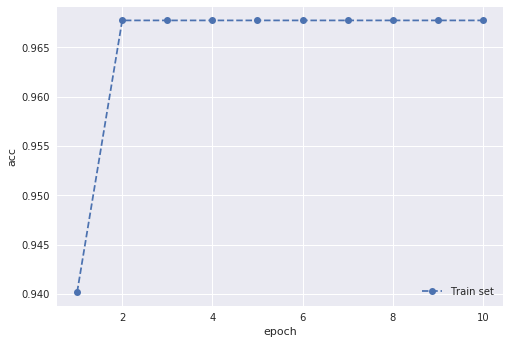

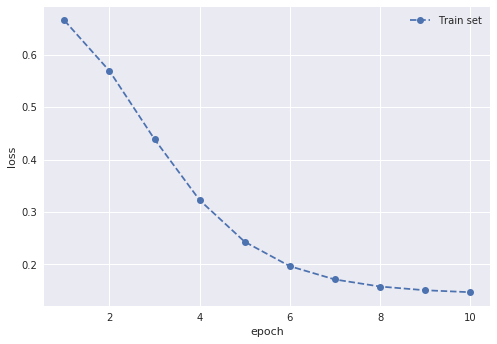

Test loss: 0.14578503427232148
Test accuracy: 0.9677418956331386
Nodes: 2
157/157 [==============================] - 1s 5ms/step
Training time: 0:00:03.745951
Epoch time avg: 0:00:00.374576


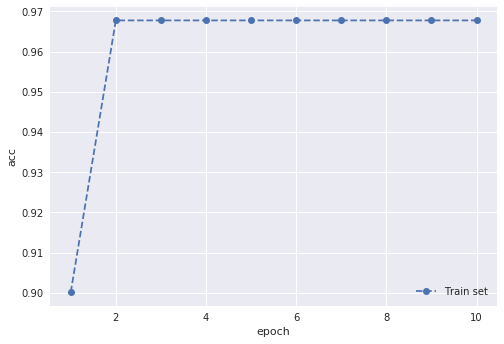

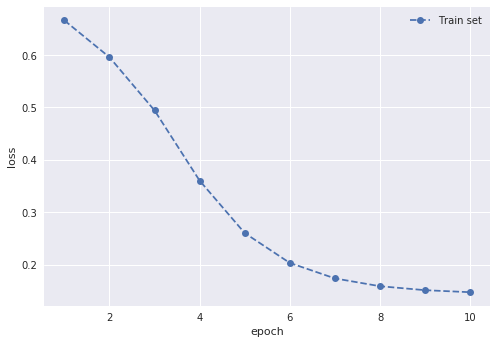

Test loss: 0.14596696919316698
Test accuracy: 0.9677418956331386
Nodes: 3
157/157 [==============================] - 1s 5ms/step
Training time: 0:00:03.798099
Epoch time avg: 0:00:00.379791


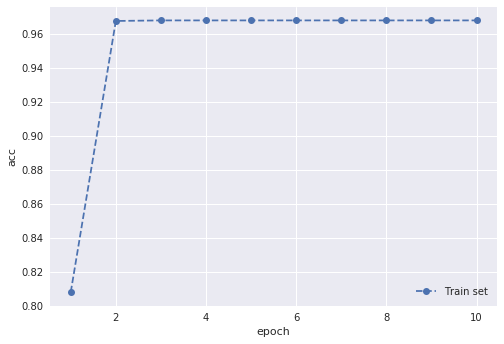

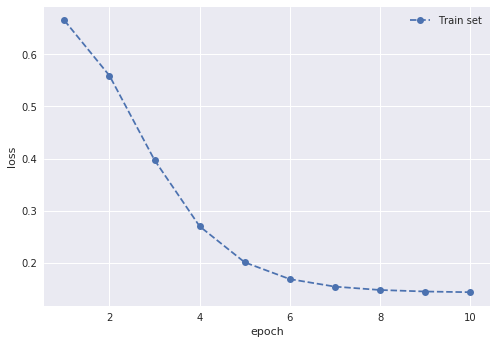

Test loss: 0.14385338905890277
Test accuracy: 0.9677418956331386
Nodes: 4
157/157 [==============================] - 1s 5ms/step
Training time: 0:00:03.869696
Epoch time avg: 0:00:00.386950


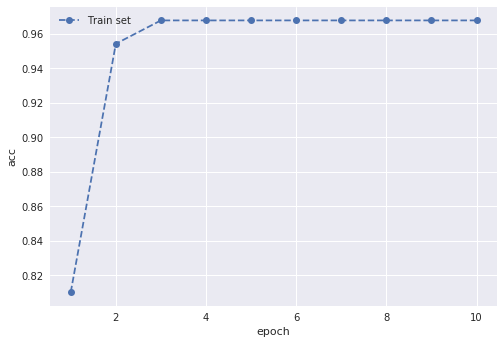

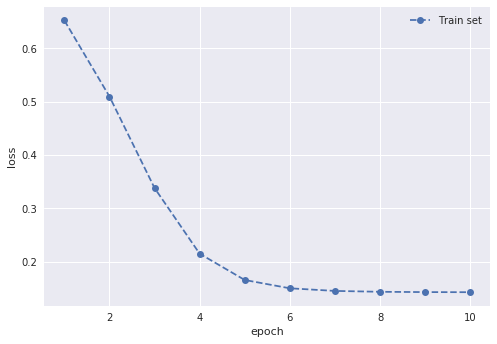

Test loss: 0.14285885015870356
Test accuracy: 0.9677418956331386
Nodes: 5
157/157 [==============================] - 1s 5ms/step
Training time: 0:00:03.956585
Epoch time avg: 0:00:00.395639


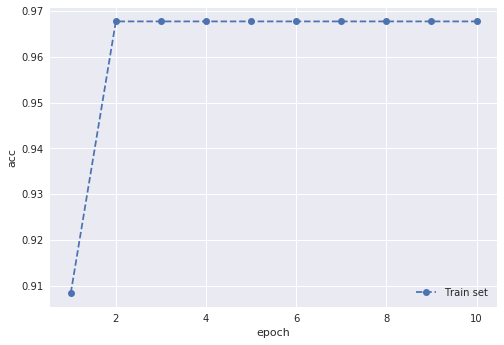

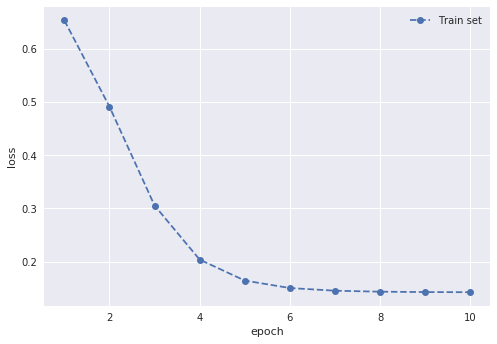

Test loss: 0.1428593367717828
Test accuracy: 0.9677418956331386
Nodes: 6
157/157 [==============================] - 1s 5ms/step
Training time: 0:00:04.038187
Epoch time avg: 0:00:00.403799


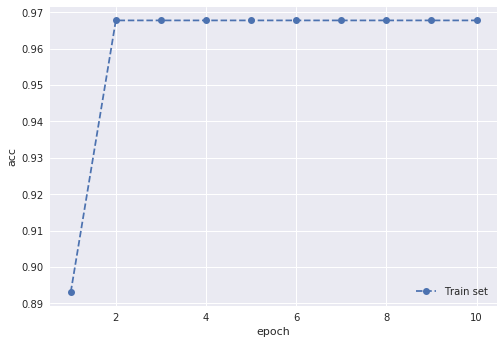

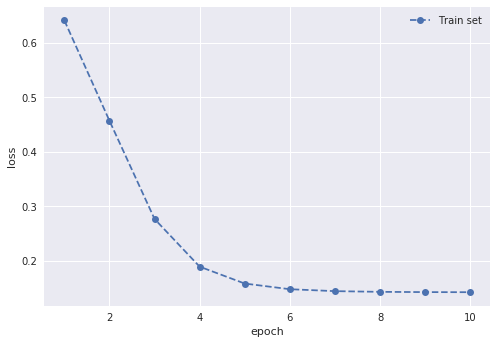

Test loss: 0.14299567375972771
Test accuracy: 0.9677418956331386
Nodes: 7
157/157 [==============================] - 1s 5ms/step
Training time: 0:00:04.123274
Epoch time avg: 0:00:00.412308


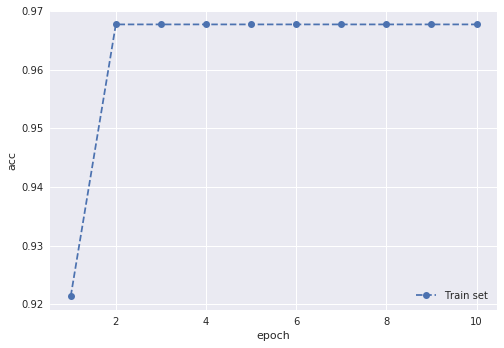

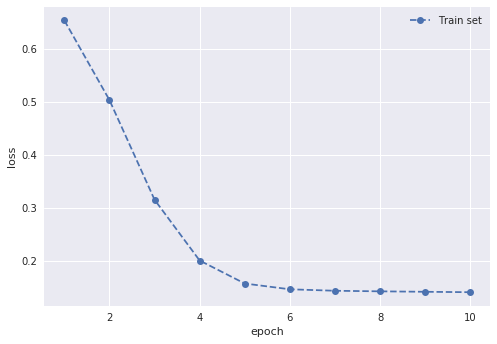

Test loss: 0.1409310193578149
Test accuracy: 0.9677418956331386
Nodes: 8
157/157 [==============================] - 1s 5ms/step
Training time: 0:00:04.098886
Epoch time avg: 0:00:00.409870


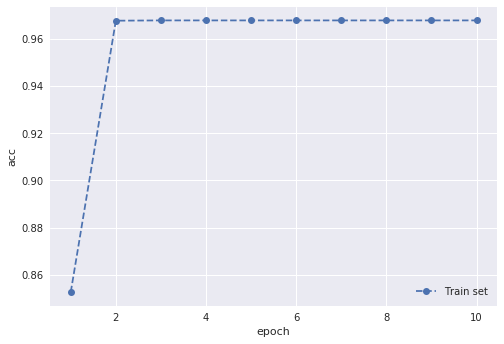

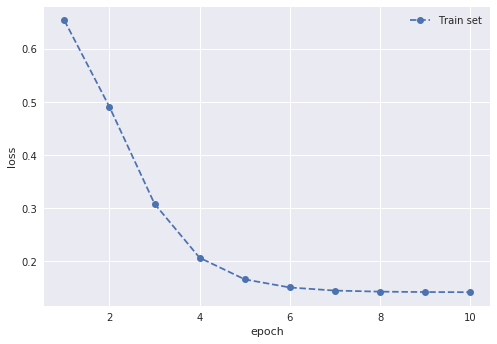

Test loss: 0.14246879432611403
Test accuracy: 0.9677418956331386
Nodes: 9
157/157 [==============================] - 1s 5ms/step
Training time: 0:00:04.226459
Epoch time avg: 0:00:00.422627


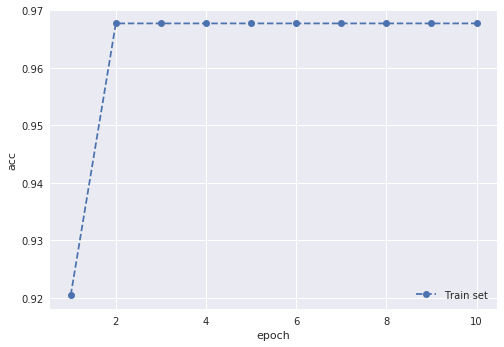

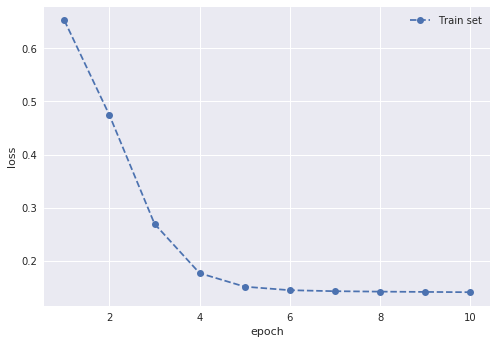

Test loss: 0.14150616555077256
Test accuracy: 0.9677418956331386
Nodes: 10
157/157 [==============================] - 1s 6ms/step
Training time: 0:00:04.223612
Epoch time avg: 0:00:00.422342


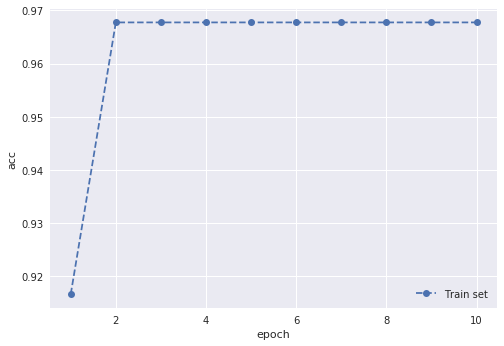

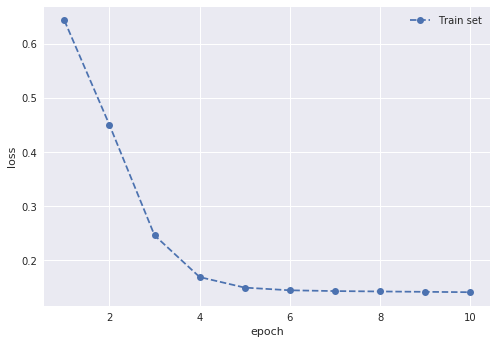

Test loss: 0.14087136763675956
Test accuracy: 0.9677418956331386
Nodes: 11
157/157 [==============================] - 1s 6ms/step
Training time: 0:00:04.400710
Epoch time avg: 0:00:00.440052


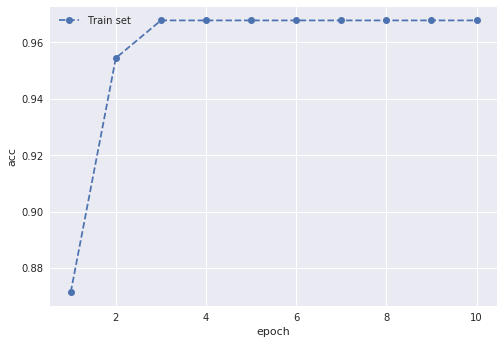

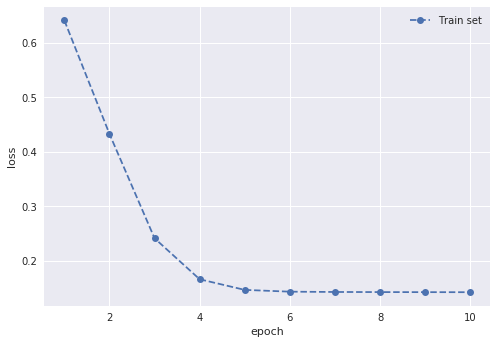

Test loss: 0.14237384811328474
Test accuracy: 0.9677418956331386
Nodes: 12
157/157 [==============================] - 1s 6ms/step
Training time: 0:00:04.422206
Epoch time avg: 0:00:00.442201


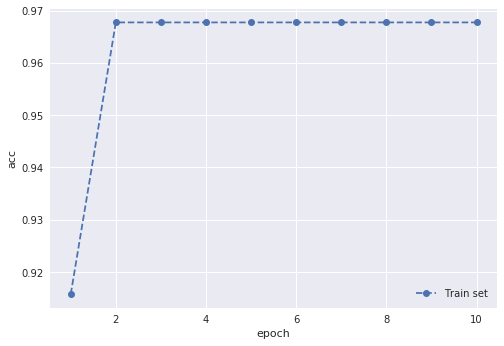

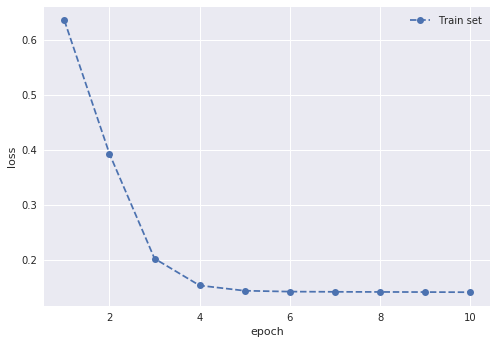

Test loss: 0.14162064623680842
Test accuracy: 0.9677418956331386
Nodes: 13
157/157 [==============================] - 1s 6ms/step
Training time: 0:00:04.491016
Epoch time avg: 0:00:00.449083


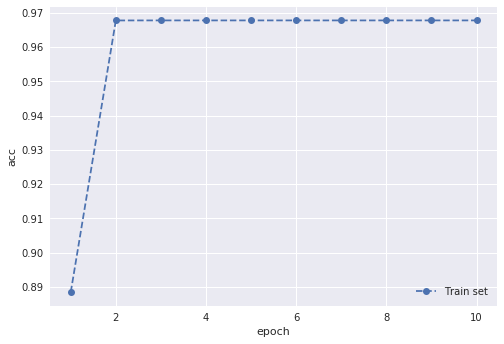

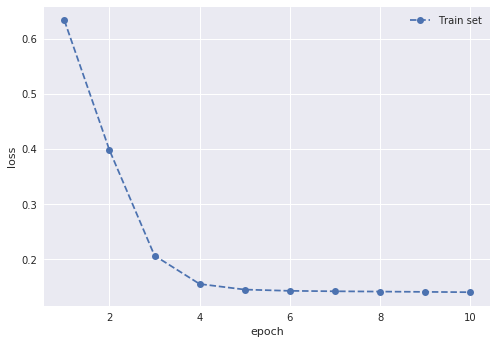

Test loss: 0.14082010973031353
Test accuracy: 0.9677418956331386
Nodes: 14
157/157 [==============================] - 1s 7ms/step
Training time: 0:00:04.552275
Epoch time avg: 0:00:00.455207


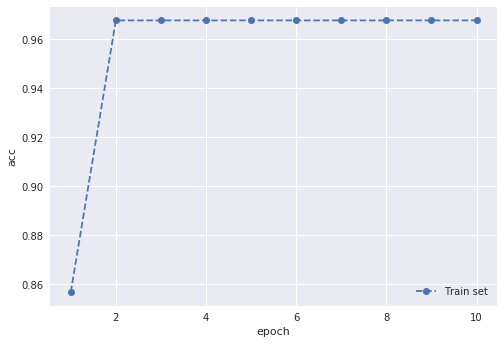

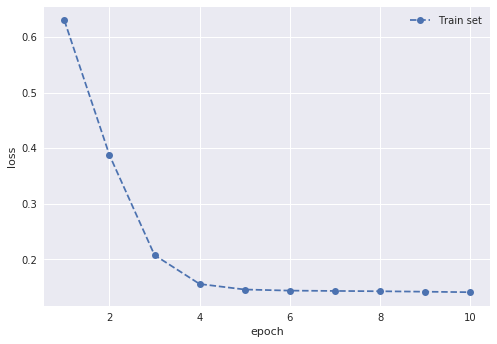

Test loss: 0.14022608661347893
Test accuracy: 0.9677418956331386
Nodes: 15
157/157 [==============================] - 1s 6ms/step
Training time: 0:00:04.560794
Epoch time avg: 0:00:00.456060


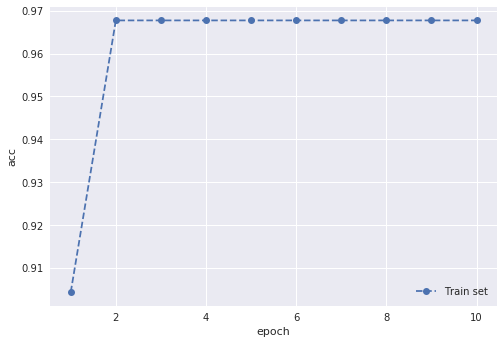

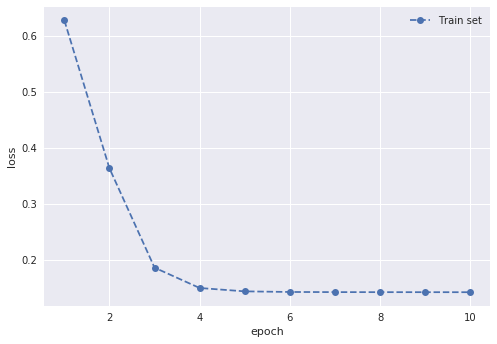

Test loss: 0.14268472002949684
Test accuracy: 0.9677418956331386
Nodes: 16
157/157 [==============================] - 1s 7ms/step
Training time: 0:00:04.728457
Epoch time avg: 0:00:00.472826


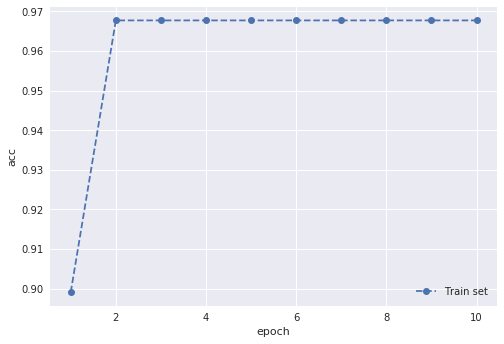

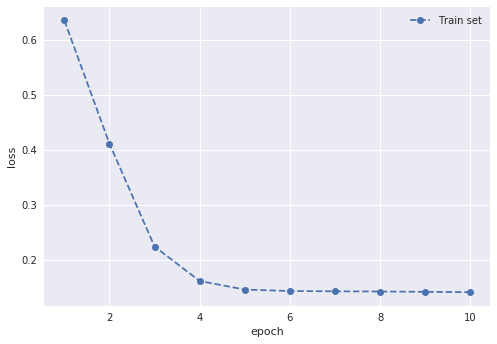

Test loss: 0.14086641437688452
Test accuracy: 0.9677418956331386
Nodes: 17
157/157 [==============================] - 1s 7ms/step
Training time: 0:00:04.796907
Epoch time avg: 0:00:00.479671


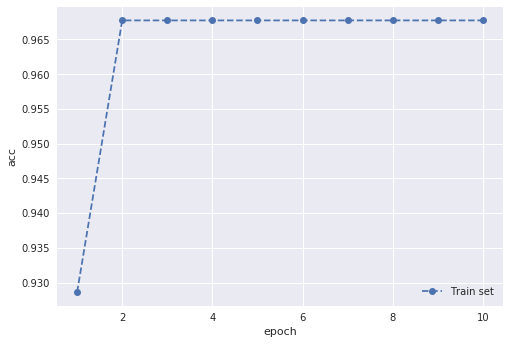

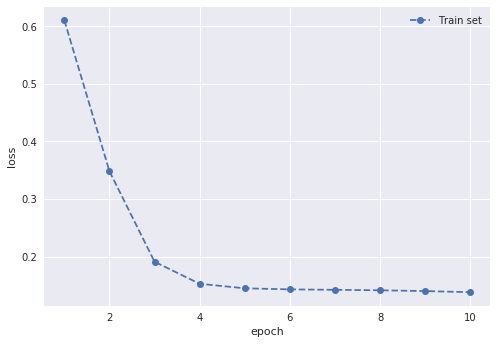

Test loss: 0.13730527432101547
Test accuracy: 0.9677418956331386
Nodes: 18
157/157 [==============================] - 1s 7ms/step
Training time: 0:00:04.969445
Epoch time avg: 0:00:00.496925


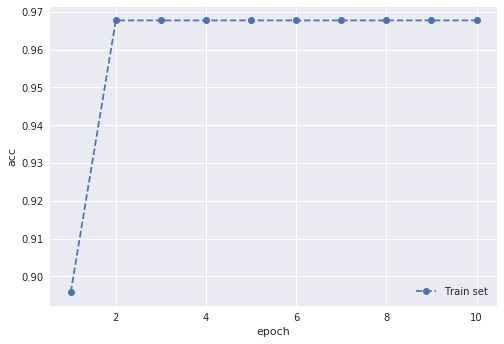

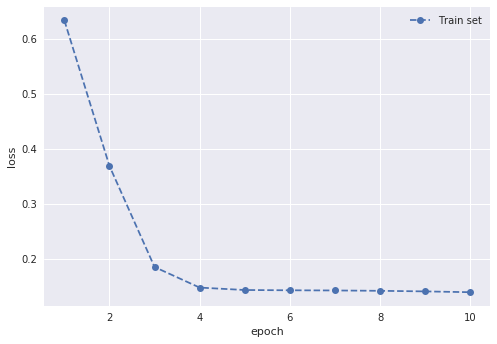

Test loss: 0.1388930850158072
Test accuracy: 0.9677418956331386
Nodes: 19


In [ ]:
nn.train(X, y)

# 

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print(X.shape)
print(y.shape)

tmp = DecisionTreeClassifier(min_samples_leaf=10)
tmp.fit(X_train, y_train)
y_pred = tmp.predict(X_test)
print('test', accuracy_score(y_pred, y_test))
y_pred_train = tmp.predict(X_train)
print('train', accuracy_score(y_pred_train, y_train))

(3131, 64)
(3131, 31)
test 0.2679425837320574
train 0.46246006389776356


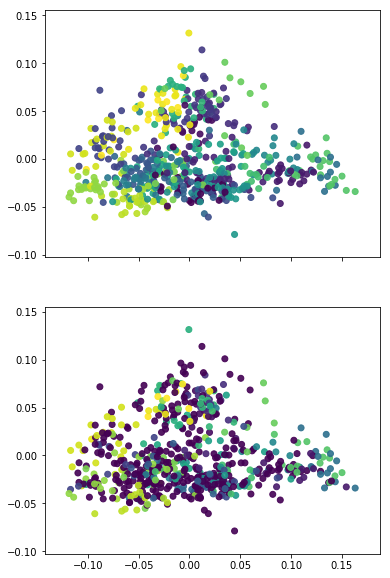

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)
# print(pca.components_)
X_proj = pca.transform(X_test)

f, ax = plt.subplots(2, sharex=True)
f.set_figheight(10)
ax[0].scatter(X_proj[:, 0], X_proj[:, 1], c=np.argmax(y_test, axis=1), alpha=0.9)
ax[1].scatter(X_proj[:, 0], X_proj[:, 1], c=np.argmax(y_pred, axis=1), alpha=0.9)